In [182]:
import sys
sys.path.append("train")
sys.path.append("evaluation")

import pandas as pd

import som_model
importlib.reload(som_model)
from som_model import train_som_model

import importlib

import som_strategy_runner
importlib.reload(som_strategy_runner)
from som_strategy_runner import get_datasets_from_df, generate_cluster_signals, process_and_signal_split, plot_umatrix, plot_signals, run_rolling_som_strategy, summarize_rolling_results, process_and_signal



import strategy_eval
importlib.reload(strategy_eval)
from strategy_eval import simulate_strategy, evaluate_strategy, plot_strategy, compute_fear_greed_index, compare_strategies, compare_all_strategies


In [ ]:
df_tech = pd.read_csv("dataset/numerical.csv", parse_dates=["Date"])
df_tech.set_index("Date", inplace=True)
df_sent = pd.read_csv("dataset/sentiment.csv", parse_dates=["Date"])
df_sent.set_index("Date", inplace=True)
df_hybrid = pd.read_csv("dataset/merged.csv", parse_dates=["Date"])
df_hybrid.set_index("Date", inplace=True)

In [139]:
df_tech.head()

,Close,High,Low,Open,Volume,RSI,MACD,CCI,WILLR,SMA_50,SMA_200,EMA_50,EMA_200,Bollinger_Upper,Bollinger_Lower,ATR,OBV,CMF,Momentum,ROC,UO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8036550.0,NaN,NaN,NaN,NaN
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15897200.0,NaN,NaN,NaN,NaN
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17157200.0,NaN,NaN,NaN,NaN
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72786300.0,NaN,NaN,NaN,NaN
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.767461,247.845345,NaN,-28823500.0,NaN,NaN,NaN,NaN


In [140]:
df_tech.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'MACD', 'CCI', 'WILLR',
       'SMA_50', 'SMA_200', 'EMA_50', 'EMA_200', 'Bollinger_Upper',
       'Bollinger_Lower', 'ATR', 'OBV', 'CMF', 'Momentum', 'ROC', 'UO'],
      dtype='object')

In [141]:
df_sent.head()

,Close,High,Low,Open,Volume,avg_sentiment_score,avg_sentiment_label_score,pos_count,neut_count,neg_count,total,pct_positive,pct_neutral,pct_negative
Date,,,,,,,,,,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550,0.920846,-1.0,0.0,0.0,1.0,1.0,0.000000,0.000000,1.000000
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,0.997252,0.0,1.0,2.0,1.0,4.0,0.250000,0.500000,0.250000
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,0.999941,0.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.000000
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,0.673966,-1.0,0.0,0.0,1.0,1.0,0.000000,0.000000,1.000000
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,0.945152,0.0,1.0,9.0,1.0,11.0,0.090909,0.818182,0.090909


In [142]:
df_sent.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'avg_sentiment_score',
       'avg_sentiment_label_score', 'pos_count', 'neut_count', 'neg_count',
       'total', 'pct_positive', 'pct_neutral', 'pct_negative'],
      dtype='object')

In [143]:
df_hybrid.head()

,Close,High,Low,Open,Volume,RSI,MACD,CCI,WILLR,SMA_50,SMA_200,EMA_50,EMA_200,Bollinger_Upper,Bollinger_Lower,ATR,OBV,CMF,Momentum,ROC,UO,date,avg_sentiment_score,avg_sentiment_label_score,pos_count,neut_count,neg_count,total,pct_positive,pct_neutral,pct_negative
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8036550.0,NaN,NaN,NaN,NaN,2015-01-01,0.920846,-1.0,0.0,0.0,1.0,1.0,0.000000,0.000000,1.000000
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15897200.0,NaN,NaN,NaN,NaN,2015-01-02,0.997252,0.0,1.0,2.0,1.0,4.0,0.250000,0.500000,0.250000
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17157200.0,NaN,NaN,NaN,NaN,2015-01-03,0.999941,0.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.000000
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72786300.0,NaN,NaN,NaN,NaN,2015-01-04,0.673966,-1.0,0.0,0.0,1.0,1.0,0.000000,0.000000,1.000000
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.767461,247.845345,NaN,-28823500.0,NaN,NaN,NaN,NaN,2015-01-05,0.945152,0.0,1.0,9.0,1.0,11.0,0.090909,0.818182,0.090909


In [144]:
df_hybrid.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'MACD', 'CCI', 'WILLR',
       'SMA_50', 'SMA_200', 'EMA_50', 'EMA_200', 'Bollinger_Upper',
       'Bollinger_Lower', 'ATR', 'OBV', 'CMF', 'Momentum', 'ROC', 'UO', 'date',
       'avg_sentiment_score', 'avg_sentiment_label_score', 'pos_count',
       'neut_count', 'neg_count', 'total', 'pct_positive', 'pct_neutral',
       'pct_negative'],
      dtype='object')

## Technical SOM

In [145]:
tech_cols = ['Volume', 'RSI', 'MACD', 'CCI', 'WILLR', 'ATR', 'OBV', 'CMF', 'ROC', 'UO', 'Close']

train_df, test_df = get_datasets_from_df(df_tech)

tech_clusters, som_tech = train_som_model(df_tech, tech_cols, model_name="technical")

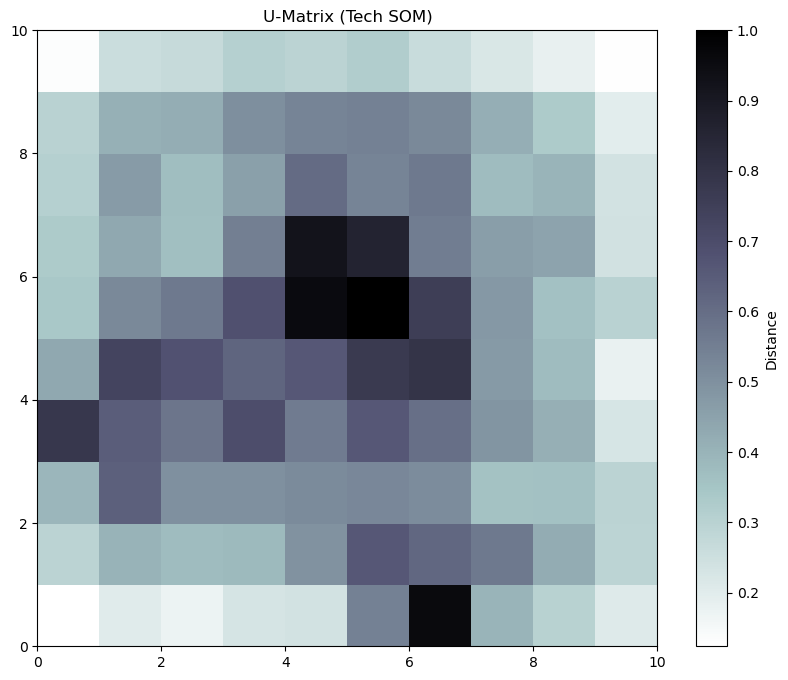

In [146]:
plot_umatrix(som_tech, title="U-Matrix (Tech SOM)")

Counter({'0_9': 590, '3_7': 485, ... mostra quantos dias (amostras) oram mapeadas em cada "nó" da grade do SOM. Clusters com mais amostras podem indicar padrões frequentes, enquanto clusters raros (com < 10) podem representar situações atípicas de mercado.

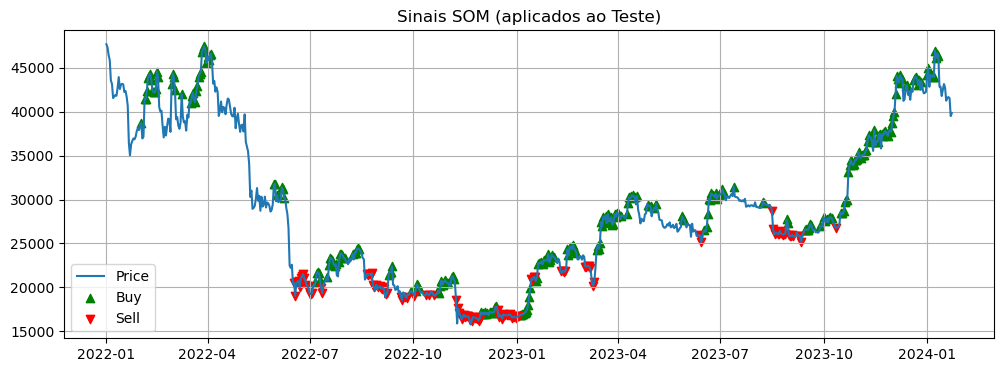

In [147]:
test_df_cut_tech = process_and_signal_split(train_df, test_df, som_tech, tech_cols)

In [148]:
print(test_df_cut_tech['signal'].value_counts())

hold    346
buy     287
sell    120
Name: signal, dtype: int64


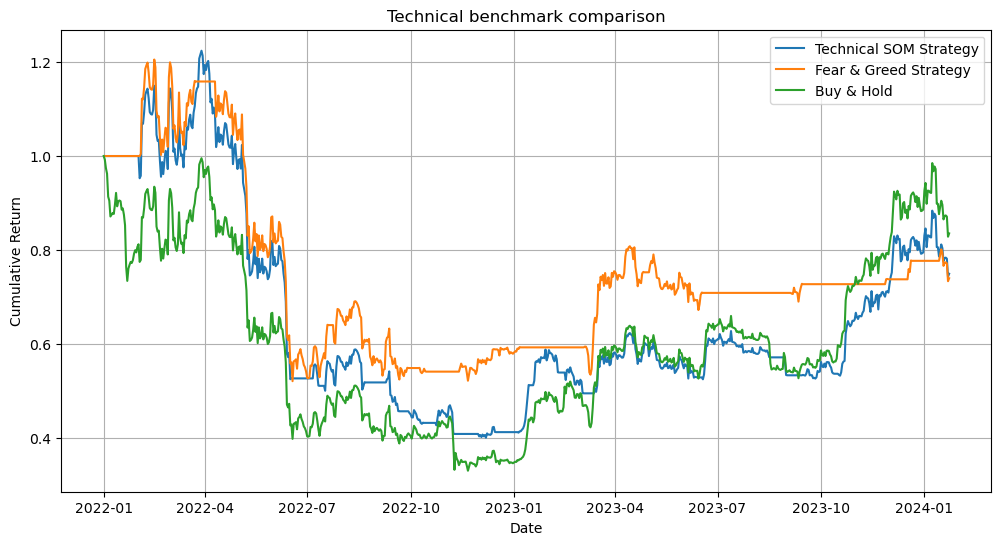


METRICS
Strategy                      Return     Sharpe     Drawdown
------------------------------------------------------------
Technical SOM Strategy          0.75      -0.05       67.22%
Fear & Greed Strategy           0.74      -0.10       56.73%
Buy & Hold                      0.84          —            —


In [172]:
compare_strategies(df_tech, "Technical", test_df_cut_tech)

## Sentiment SOM

In [156]:
sentiment_cols = [
    'avg_sentiment_score', 'avg_sentiment_label_score',
    'pos_count', 'neut_count', 'neg_count',
    'pct_positive', 'pct_neutral', 'pct_negative'
]

train_df, test_df = get_datasets_from_df(df_sent)

sent_clusters, som_sent = train_som_model(df_sent, sentiment_cols, model_name="sentiment")

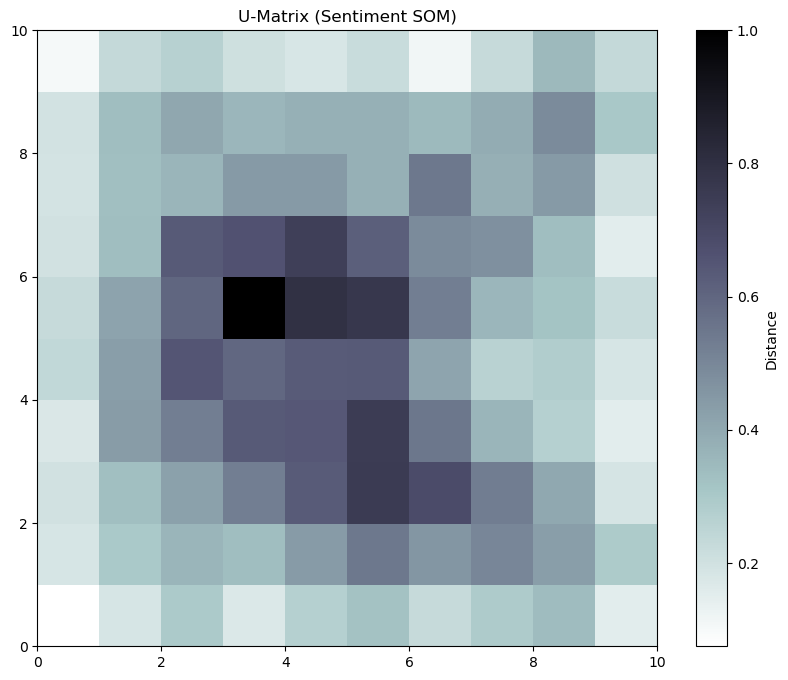

In [157]:
plot_umatrix(som_sent, title="U-Matrix (Sentiment SOM)")

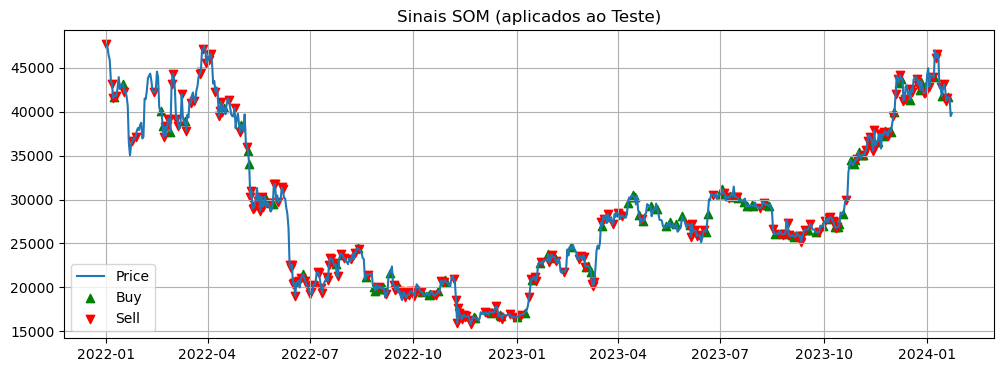

In [158]:
test_df_cut_sent = process_and_signal_split(train_df, test_df, som_sent, sentiment_cols)

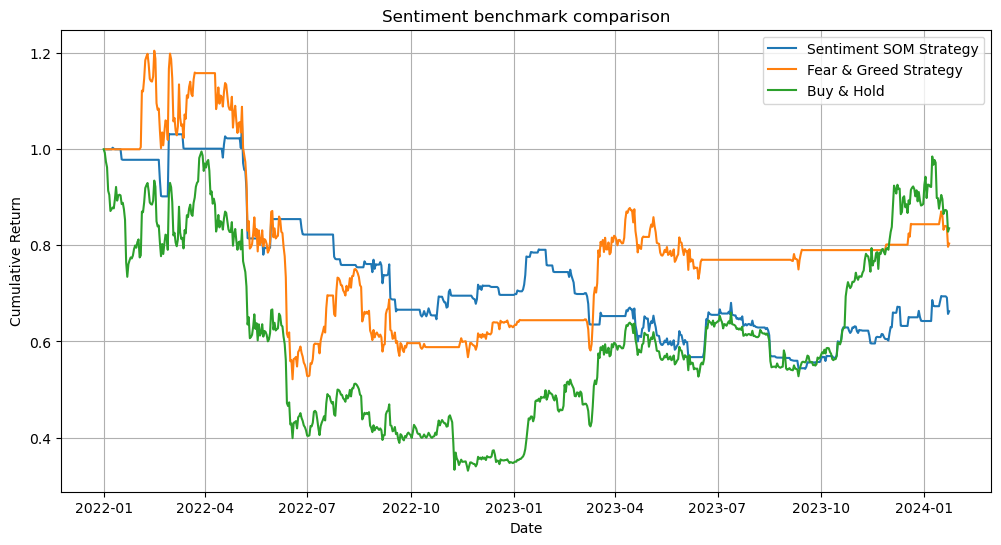


METRICS
Strategy                      Return     Sharpe     Drawdown
------------------------------------------------------------
Sentiment SOM Strategy          0.66      -0.46       48.49%
Fear & Greed Strategy           0.80      -0.02       56.73%
Buy & Hold                      0.84          —            —


In [173]:
df_sent_with_vol = df_sent.copy()
test_df_cut_sent_with_vol = test_df_cut_sent.copy()
test_df_cut_sent_with_vol["Volume"] = df_sent_with_vol["Volume"]
compare_strategies(df_sent_with_vol, "Sentiment", test_df_cut_sent_with_vol)

## Hybrid SOM

In [162]:
hybrid_cols = [
    # Técnicas
    'RSI', 'MACD', 'CCI', 'WILLR', 'ATR', 'OBV',
    # Sentimento
    'avg_sentiment_score',
    'pos_count',
    'neg_count',
    'pct_positive'
]

train_df, test_df = get_datasets_from_df(df_hybrid)

hybrid_clusters, som_hybrid = train_som_model(df_hybrid, hybrid_cols, model_name="hybrid")


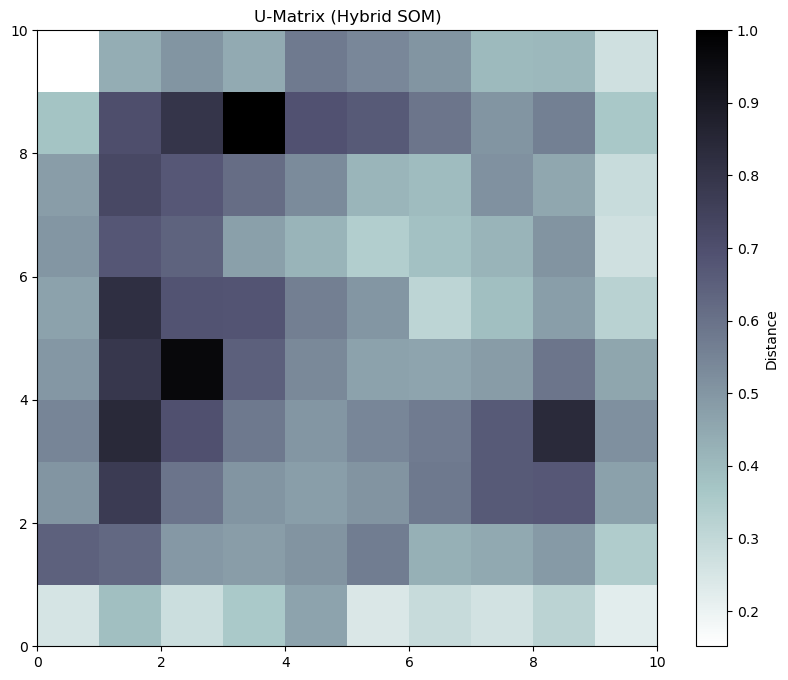

In [163]:
plot_umatrix(som_hybrid, title="U-Matrix (Hybrid SOM)")

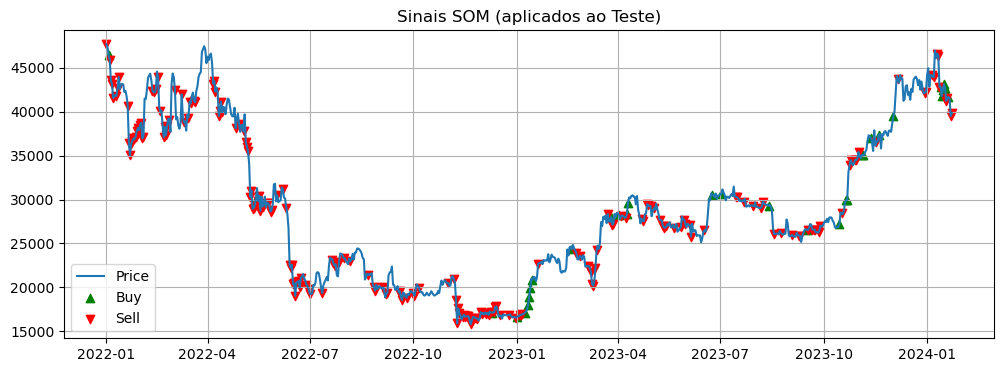

In [164]:
test_df_cut_hybrid = process_and_signal_split(train_df, test_df, som_hybrid, hybrid_cols)

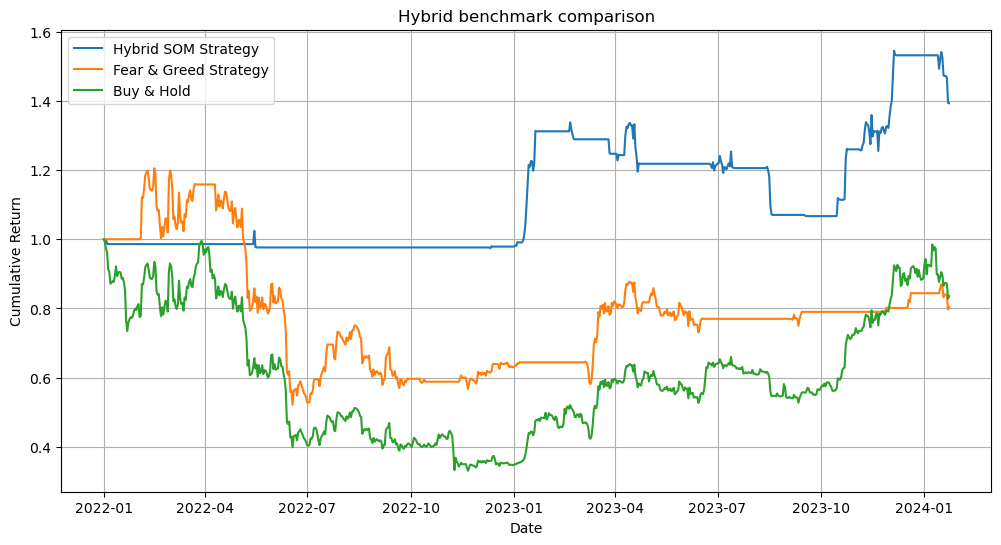


METRICS
Strategy                      Return     Sharpe     Drawdown
------------------------------------------------------------
Hybrid SOM Strategy             1.39       0.76       20.25%
Fear & Greed Strategy           0.80      -0.02       56.73%
Buy & Hold                      0.84          —            —


In [174]:
df_hybrid_with_vol = df_hybrid.copy()
test_df_cut_hybrid_with_vol = test_df_cut_hybrid.copy()
test_df_cut_hybrid_with_vol["Volume"] = df_hybrid_with_vol["Volume"]
compare_strategies(df_hybrid_with_vol, "Hybrid", test_df_cut_hybrid_with_vol)

## All SOMs comparison

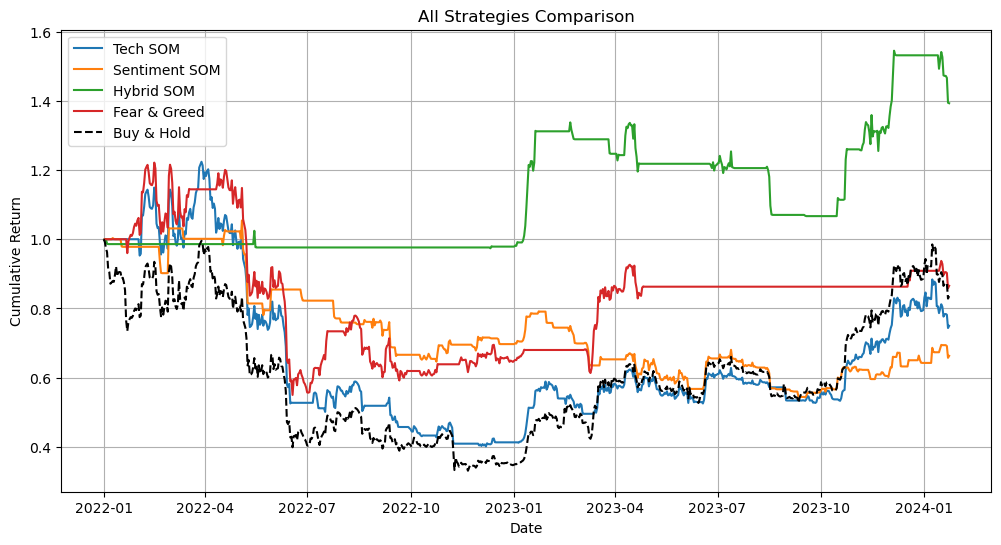


 METRICS
Strategy                 Return     Sharpe     Drawdown
-------------------------------------------------------
Tech SOM                   0.75      -0.05       67.22%
Sentiment SOM              0.66      -0.46       48.49%
Hybrid SOM                 1.39       0.76       20.25%
Fear & Greed               0.87       0.03       54.96%
Buy & Hold                 0.84          —            —


In [175]:
compare_all_strategies(
    df_tech=df_tech,
    df_sent=df_sent,
    df_hybrid=df_hybrid,
    test_df_cut_tech=test_df_cut_tech,
    test_df_cut_sent=test_df_cut_sent,
    test_df_cut_hybrid=test_df_cut_hybrid
)

## Rolling SOM

In [176]:
rolling_tech = run_rolling_som_strategy(
    df=df_tech,
    feature_cols=tech_cols,
    strategy_name="Technical SOM"
)

<Axes: title={'center': 'Rolling Window Performance'}, xlabel='window_end'>

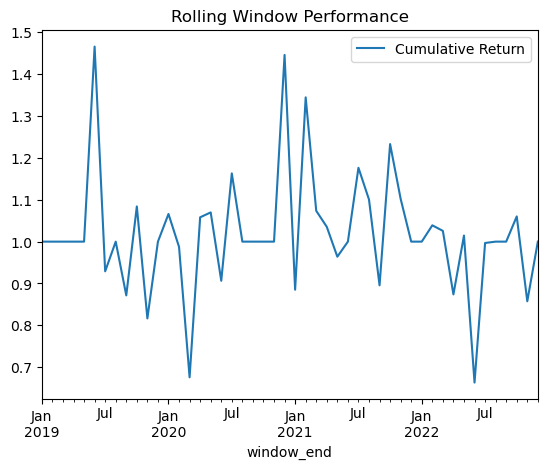

In [177]:
rolling_results = pd.DataFrame(rolling_tech)
rolling_results.set_index('window_end').plot(y='Cumulative Return', title='Rolling Window Performance')

    Cumulative Return  Sharpe Ratio  Max Drawdown window_start window_end  \
0            1.000000      0.000000      0.000000   2017-01-01 2019-01-01   
1            1.000000      0.000000      0.000000   2017-02-01 2019-02-01   
2            1.000000      0.000000      0.000000   2017-03-01 2019-03-01   
3            1.000000      0.000000      0.000000   2017-04-01 2019-04-01   
4            1.000000      0.000000      0.000000   2017-05-01 2019-05-01   
5            1.465947      4.928304      0.128164   2017-06-01 2019-06-01   
6            0.929051     -0.335777      0.264451   2017-07-01 2019-07-01   
7            1.000000      0.000000      0.000000   2017-08-01 2019-08-01   
8            0.871608     -2.503197      0.216979   2017-09-01 2019-09-01   
9            1.084099      1.430679      0.121313   2017-10-01 2019-10-01   
10           0.816545     -4.242942      0.251226   2017-11-01 2019-11-01   
11           1.000000      0.000000      0.000000   2017-12-01 2019-12-01   

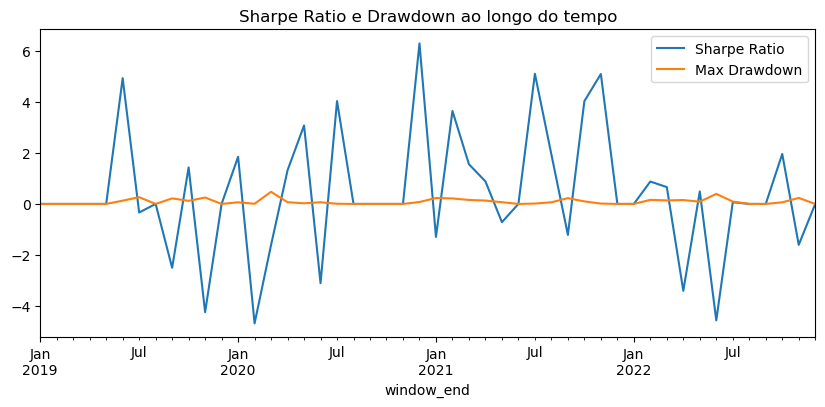

In [186]:
summarize_rolling_results(rolling_results)

<Axes: title={'center': 'Rolling Window Performance'}, xlabel='window_end'>

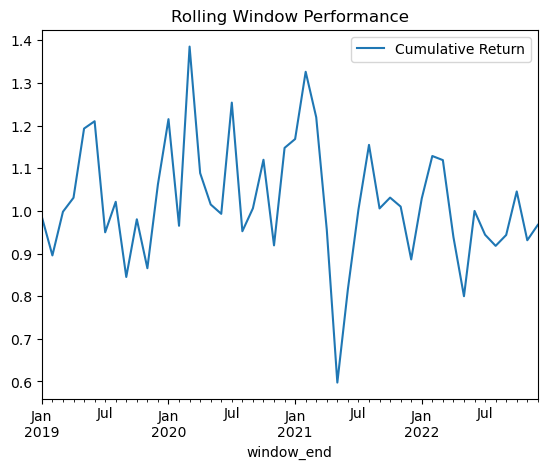

In [187]:
rolling_sent = run_rolling_som_strategy(
    df=df_sent,
    feature_cols=sentiment_cols,
    strategy_name="Sentiment SOM"
)

rolling_results_sent = pd.DataFrame(rolling_sent)
rolling_results_sent.set_index('window_end').plot(y='Cumulative Return', title='Rolling Window Performance')